In [10]:
# models
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# optimization & metrics
from sklearn.model_selection import (train_test_split, cross_val_predict, 
                                     cross_val_score, learning_curve)
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
                             precision_recall_curve, roc_curve)

# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

In [4]:
X, y = mnist.data, mnist.target

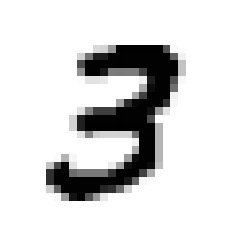

In [5]:
plot_digit(X[7])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Binary Classification
This initial section will simply scope the performance of the different available algorithms. They will be operated in binary mode, predicting if the output is 3 or not.

The best algorithms will be taken forward to build a full classifier.

In [7]:
y_train_3 = (y_train == '3')
y_test_3 = (y_test == '3')

### Stochastic Gradient Descent

In [8]:
# Stochastic Gradient Descent
losses = ['hinge', 'log', 'modified_huber', 'squared_error']
accuracies = dict()
for loss in losses:
    sgd_clf = SGDClassifier(loss=loss, random_state=1)
    sgd_clf.fit(X_train, y_train_3)
    y_train_3_pred = sgd_clf.predict(X_train)
    accuracy = accuracy_score(y_train_3, y_train_3_pred)
    accuracies[loss] = accuracy
accuracies

C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'hinge': 0.9590535714285714,
 'log': 0.9500357142857143,
 'modified_huber': 0.9656428571428571,
 'squared_error': 0.18628571428571428}

In [9]:
# 'hinge' gave the best initial pass
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train, y_train_3)
y_train_3_pred = sgd_clf.predict(X_train)
accuracy = accuracy_score(y_train_3, y_train_3_pred)
proportion_non_3 = sum(y_train != '3')/len(y_train)
print(accuracy, proportion_non_3)
# ~90% of the data is already not '3', so our classifier is correctly predicting 60% of the '3's

0.9590535714285714 0.8978392857142857


In [10]:
# using cross validation
y_train_3_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=5, method='decision_function')

In [11]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_train_pred_3)

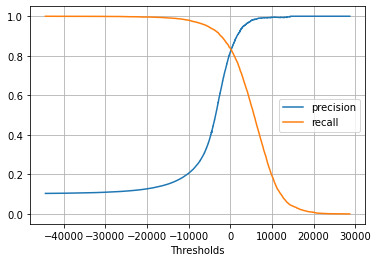

In [12]:
# Precision-Recall Tradeoff
plt.plot(thresholds, precisions[:-1], label='precision')
plt.plot(thresholds, recalls[:-1], label='recall')
plt.xlabel('Thresholds')
plt.grid()
plt.legend()

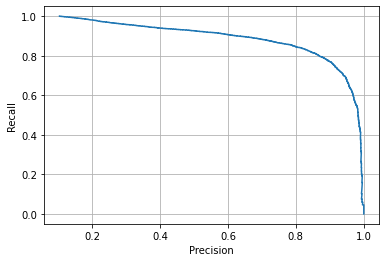

In [13]:
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()

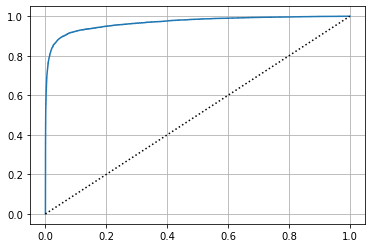

In [14]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train_3, y_train_pred_3)
plt.plot(fpr, tpr)
plt.grid()
plt.plot([0,1], [0,1], 'k:')

In [ ]:
# Random Forest 

In [16]:
forest_clf = RandomForestClassifier(random_state=1)
forest_probs_3 = cross_val_predict(forest_clf, X_train, y_train_3, cv=5, method='predict_proba')
forest_probs_3

array([[0.97, 0.03],
       [0.99, 0.01],
       [0.97, 0.03],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [18]:
y_train_3_pred_rf = forest_probs_3[:, 1]

In [19]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_3, y_train_3_pred_rf)

Text(0.5, 0, 'Thresholds')

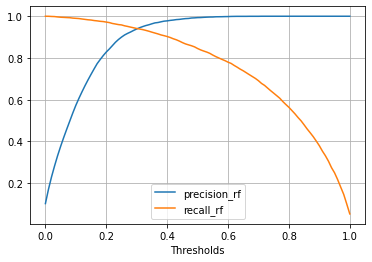

In [21]:
plt.plot(thresholds_rf, precisions_rf[:-1], label='precision_rf')
plt.plot(thresholds_rf, recalls_rf[:-1], label='recall_rf')
plt.grid()
plt.legend()
plt.xlabel('Thresholds')

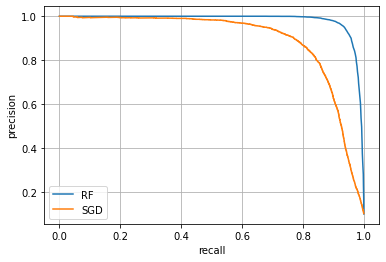

In [25]:
plt.plot(recalls_rf, precisions_rf, label='RF')
plt.plot(recalls, precisions, label='SGD')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

In [30]:
# Logistic Regression
log_clf = SGDClassifier(loss='log', random_state=1)
y_train_3_pred_log = cross_val_predict(log_clf, X_train, y_train_3, cv=5, method='decision_function')

In [33]:
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train_3, y_train_3_pred_log)

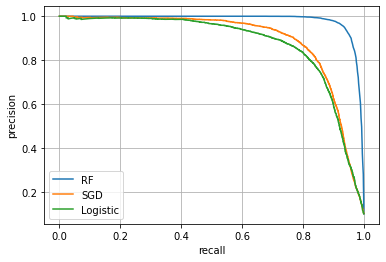

In [34]:
plt.plot(recalls_rf, precisions_rf, label='RF')
plt.plot(recalls, precisions, label='SGD')
plt.plot(recalls_log, precisions_log, label='Logistic')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

In [48]:
# SVM
# Very long training time on this
svm_clf = SVC(random_state=1)
y_train_3_pred_svm = cross_val_predict(svm_clf, X_train, y_train_3, cv=5, method='decision_function')
y_train_3_pred_svm

array([-1.0551917 , -2.29847018, -2.01038648, ..., -1.7598186 ,
       -2.57219726, -2.94274004])

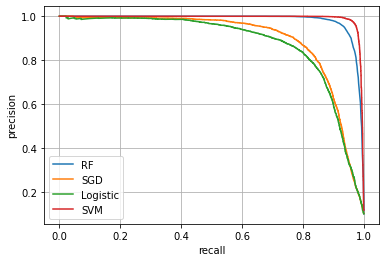

In [50]:
precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_3, y_train_3_pred_svm)
plt.plot(recalls_rf, precisions_rf, label='RF')
plt.plot(recalls, precisions, label='SGD')
plt.plot(recalls_log, precisions_log, label='Logistic')
plt.plot(recalls_svm, precisions_svm, label='SVM')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

In [52]:
# knn
knn_clf = KNeighborsClassifier()
y_train_3_pred_knn = cross_val_predict(knn_clf, X_train, y_train_3, cv=5, method='predict_proba')
y_train_3_pred_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

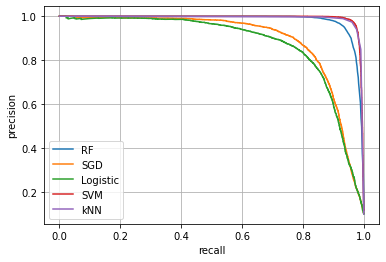

In [58]:
precisions_knn, recalls_knn, threshlds_knn = precision_recall_curve(y_train_3, y_train_3_pred_knn[:,1])
plt.plot(recalls_rf, precisions_rf, label='RF')
plt.plot(recalls, precisions, label='SGD')
plt.plot(recalls_log, precisions_log, label='Logistic')
plt.plot(recalls_svm, precisions_svm, label='SVM')
plt.plot(recalls_knn, precisions_knn, label='kNN')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

We see that the base models of the kNN and SVM are both the most accurate classifiers. We will take each of these models forward and create a multiclass classifiers using each. 

## Multiclass Classification
We now aim to build a multiclass digit classifier that achives 97% on the test set.

Some classifiers include multiclass functionality out-of-the-box. These include LogisticRegression, kNeighboursClassifier, RandomForestClassifier, GaussianNB, etc. Other classifiers, such as SGDClassifier and SVC and strictly binary classifiers. 

We are going to create full digit classifiers using the kNeighboursClassifier and SVC algorithms. SVC is strictly binary, so we will need to create numerous binary classifiers and aggregate the outputs to make a single predictor. There are two approaches to aggregate binary classifiers:
- One-vs-Rest (OvR) a.k.a. Ove-vs-All (OvA), where we train multiple single-class predictors such as a "3-predictor" and a "7-predictor" etc. This would require a total of 10 predictors, one for each digit.
- One-vs-One (OvO), which makes 1-vs-2, 1-vs-3... 2-vs-3... etc, which would require in this case 45 predictors.

Recall that the SVM scales poorly to larger training datasets, so it is much more optimal to train an SVM as a OvO aggregate. This is because a 1v2 dataset should be abot 20% as large as a 1vRest dataset, assuming that the digits are uniformly distributed.

In [3]:
mnist = fetch_openml('mnist_784', as_frame=True)

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1)

In [7]:
digits = [str(i) for i in range(0, 10)]

### SVC

In [8]:
# BRUTE FORCE APPROACH
# training one-vs-one SVC classifiers and storing them in a dictionary
# training takes a couple minutes
svc_models = dict()
for i in digits:
    for j in digits:
        if j <= i:
            continue
        selection = (y_train == i) | (y_train == j)
        X_train_loop = X_train[selection]
        y_train_loop = y_train[selection]
        svc_clf = SVC(random_state=1)
        svc_clf.fit(X_train_loop, y_train_loop)
        svc_models[(i,j)] = svc_clf
        

In [9]:
# checking accuracy of one of the classifiers as a sanity check
ones_zeros_selection = (y_train == '1') | (y_train == '0')
X_ones_zeros = X_train[ones_zeros_selection]
y_ones_zeros = y_train[ones_zeros_selection]
ones_zeros_predicted = svc_models[('0', '1')].predict(X_ones_zeros)
accuracy_score(y_ones_zeros, ones_zeros_predicted)
# It works well for the correctly chosen digits!

0.9999150237933379

In [10]:
# checking accuracy with "misaligned" digits
ones_zeros_selection = (y_train == '1') | (y_train == '4')
X_ones_zeros = X_train[ones_zeros_selection]
y_ones_zeros = y_train[ones_zeros_selection]
ones_zeros_predicted = svc_models[('0', '1')].predict(X_ones_zeros)
accuracy_score(y_ones_zeros, ones_zeros_predicted)
# It works poorly for misaligned digits

0.5318967719955711

In [11]:
# Making predictions on the train and test sets
train_predictions = []
test_predictions = []
for key, model in svc_models.items():
    # super inefficient, took 20 mins
    train_predictions.append(model.predict(X_train))
    test_predictions.append(model.predict(X_test))

In [13]:
train_predictions_df = pd.DataFrame(train_predictions)
test_predictions_df = pd.DataFrame(test_predictions)
train_predictions_df.head()
# Each row are the predictions made for each model
# We thus want to take the most frequent number in each column

,0,1,2,3,4,5,6,7,8,9,...,55990,55991,55992,55993,55994,55995,55996,55997,55998,55999
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,0,0,0,0,0
2,3,3,3,3,3,3,0,3,3,3,...,0,0,0,3,0,3,0,3,0,0
3,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,0,0,0,0,0
4,5,5,5,5,5,5,0,5,5,5,...,5,0,5,5,5,5,0,5,0,0


In [15]:
train_predictions = []
test_predictions = []
for header in train_predictions_df.columns:
    train_predictions.append(train_predictions_df[header].value_counts().idxmax())
for header in test_predictions_df.columns:
    test_predictions.append(test_predictions_df[header].value_counts().idxmax())

train_predictions = np.array(train_predictions)
test_predictions = np.array(test_predictions)

In [16]:
accuracy_score(y_train, train_predictions), \
    accuracy_score(y_test, test_predictions)

(0.9896071428571429, 0.9785714285714285)

We have thus accomplished the task of building a digit predictor with >97% accuracy! Though the prediction part of the pipeline took very long and is not ideal. Let's try this with the built-in OvO and OvA sklearn functions.

In [19]:
# One versus One
# no hyperparameter tuning or CV
ovo_clf_svm = OneVsOneClassifier(SVC(random_state=1))
ovo_clf_svm.fit(X_train, y_train)
y_train_pred_ovo = ovo_clf_svm.predict(X_train)
y_test_pred_ovo = ovo_clf_svm.predict(X_test)
accuracy_score(y_train, y_train_pred_ovo), \
    accuracy_score(y_test, y_test_pred_ovo)
# We see that the OvO function produces the exact same results as those above
# This did however take around 20 minutes

(0.9894821428571429, 0.9782142857142857)

In [20]:
# One versus All
# Takes very long to train
ovr_clf_svm = OneVsRestClassifier(SVC(random_state=1))
ovr_clf_svm.fit(X_train, y_train)
y_train_pred_ovr = ovr_clf_svm.predict(X_train)
y_test_pred_ovr = ovr_clf_svm.predict(X_test)
accuracy_score(y_train, y_train_pred_ovo), \
    accuracy_score(y_test, y_test_pred_ovo)

(0.9894821428571429, 0.9782142857142857)

### KNeighboursClassifier

In [7]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_train_pred_knn = knn_clf.predict(X_train)
accuracy_score(y_train, y_train_pred_knn)

0.981

In [9]:
y_test_pred_knn = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_pred_knn)

0.9720714285714286

In [12]:
train_sizes, train_scores, validation_scored = learning_curve(knn_clf, 
                                                              X_train,
                                                              y_train,
                                                              cv=5)

In [15]:
train_error = train_scores.mean(axis=1)
validation_error = validation_scored.mean(axis=1)

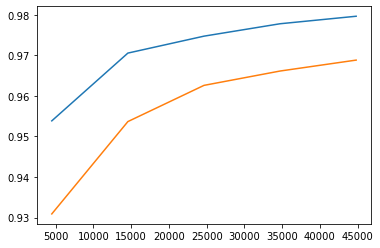

In [17]:
plt.plot(train_sizes, train_error, label='training')
plt.plot(train_sizes, validation_error, label='validation')

In [ ]:
SGDClassifier().partial_fit()